In [6]:
import json
import os.path as osp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')


In [12]:
labeled_data_path = '../data/labeled_data.json'
unlabeled_data_path = '../data/unlabeled_data.json'
labeled_data_json = json.load(open(labeled_data_path, 'r'))
unlabeled_data_json = json.load(open(unlabeled_data_path, 'r'))

labeled_data_json[list(labeled_data_json.keys())[0]]

{'text': 'beloved coaches teacher students among dead in florida school shooting via',
 'hashtags': [],
 'event': '2018_fl_shooting',
 'links': ['https://t.co/nwy9droysh', '@huffpost'],
 'label': 'low'}

In [54]:
ldj = labeled_data_json
labeled_tweets = pd.DataFrame([(tid, ldj[tid]['text'], ldj[tid]['hashtags'], ldj[tid]['event'], ldj[tid]['links'], ldj[tid]['label']) 
                for tid in ldj.keys()],
                         columns=['tid', 'text', 'hashtags', 'event', 'links', 'label'])
labeled_tweets.describe()

,tid,text,hashtags,event,links,label
count,18284,18284,18284,18284,18284,18284
unique,18284,17154,4157,21,13506,2
top,541681698358824961,typhoon sweeps across philippines,[],2015_Nepal_Earthquake_en,[],low
freq,1,50,7702,5862,4303,15871


In [37]:
earthquake_events = [event for event in set(labeled_tweets.event) if 'earthquake' in event.lower()]
earthquake_events

['2012_Guatemala_earthquake',
 '2012_Costa_Rica_earthquake',
 '2015_Nepal_Earthquake_en',
 '2012_Italy_earthquakes',
 '2014_Chile_Earthquake_en']

In [38]:
flood_events = [event for event in set(labeled_tweets.event) if 'flood' in event.lower()]
flood_events

['2013_Colorado_floods',
 '2013_Queensland_floods',
 '2013_Manila_floods',
 '2012_Philipinnes_floods',
 '2013_Alberta_floods']

low     15871
high     2413
Name: label, dtype: int64


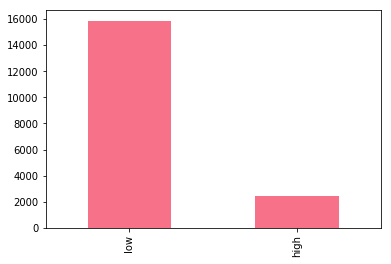

In [49]:
labeled_tweets.label.value_counts().plot(kind='bar')
print(labeled_tweets.label.value_counts())

2015_Nepal_Earthquake_en               5862
2014_Philippines_Typhoon_Hagupit_en    3941
2015_paris_attack                      2061
2013_Alberta_floods                     721
2013_Queensland_floods                  713
2013_Australia_bushfire                 677
2013_Typhoon_Yolanda                    564
2013_Boston_bombings                    535
2018_fl_shooting                        463
2012_Philipinnes_floods                 437
2013_Manila_floods                      411
2014_Chile_Earthquake_en                311
2012_Colorado_wildfires                 262
2012_Costa_Rica_earthquake              247
2012_Typhoon_Pablo                      244
2013_Colorado_floods                    234
2013_West_Texas_explosion               183
2013_LA_airport_shootings               160
2012_Guatemala_earthquake               154
2012_Italy_earthquakes                  103
2013_Lac_Megantic_train_crash             1
Name: event, dtype: int64


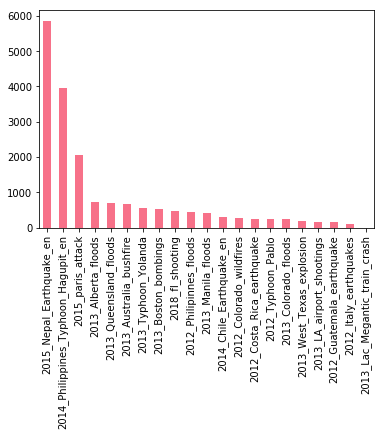

In [51]:
labeled_tweets.event.value_counts().plot(kind='bar')
print(labeled_tweets.event.value_counts())